In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import*
from fastai.vision import*

In [3]:
path = Path('data/anime-faces')

In [4]:
data = ImageDataBunch.from_folder(path, bs = 64, size = 128, valid_pct = 0.2, ds_tfms = get_transforms()).normalize(imagenet_stats)

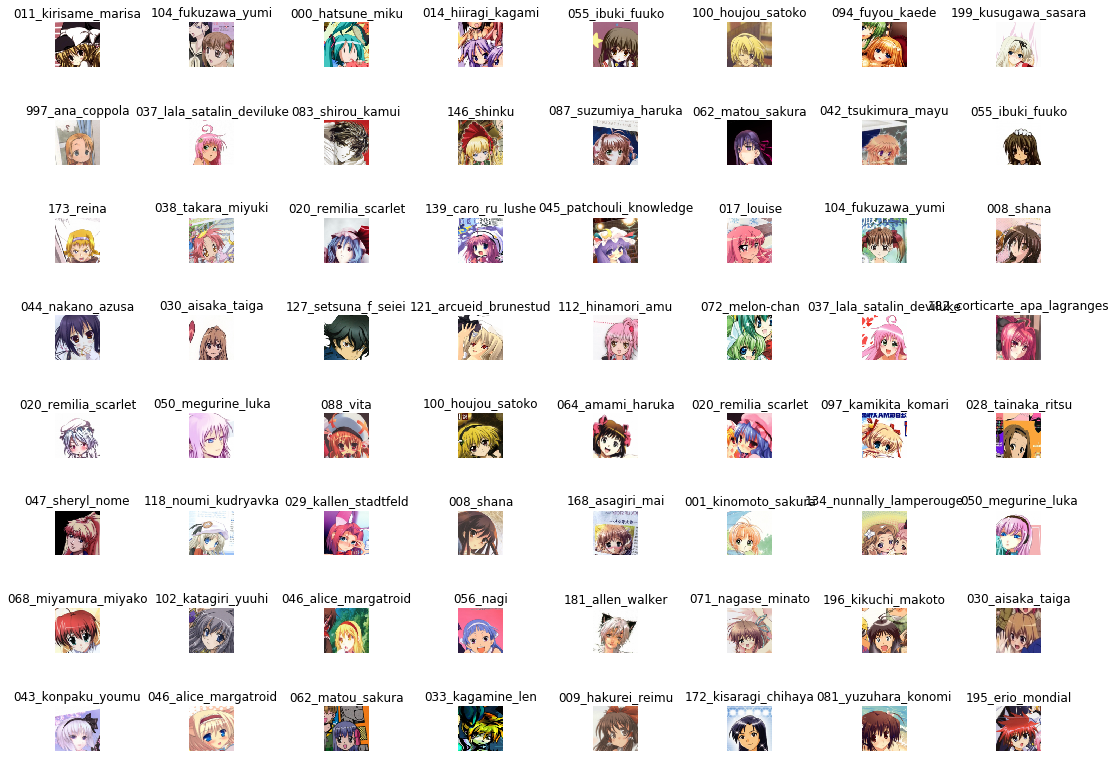

In [5]:
data.show_batch(9, figsize=(15,11))

In [6]:
learn = cnn_learner(data, models.resnet50, metrics = accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


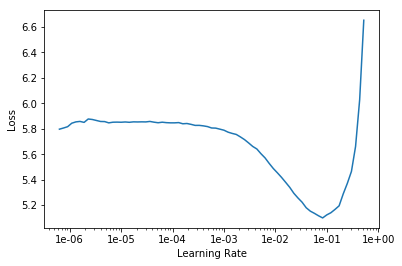

In [7]:
learn.lr_find()
learn.recorder.plot()

In [8]:
learn.fit_one_cycle(15)

epoch,train_loss,valid_loss,accuracy,time
0,4.414841,3.352765,0.335881,02:39
1,2.611976,1.781268,0.599861,02:44
2,1.646389,1.103456,0.723862,02:32
3,1.226883,0.866015,0.776311,02:29
4,0.982102,0.750661,0.792636,02:27
5,0.822349,0.666677,0.819382,02:28
6,0.677873,0.590819,0.839180,02:28
7,0.567777,0.551590,0.853769,02:24
8,0.480819,0.533442,0.861758,02:23
9,0.417447,0.491344,0.870094,02:25


In [9]:
learn.save('stage-1')

In [10]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (11518 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
000_hatsune_miku,000_hatsune_miku,000_hatsune_miku,000_hatsune_miku,000_hatsune_miku
Path: data\anime-faces;

Valid: LabelList (2879 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
176_sendou_erika,074_daidouji_tomoyo,037_lala_satalin_deviluke,134_nunnally_lamperouge,046_alice_margatroid
Path: data\anime-faces;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, k

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


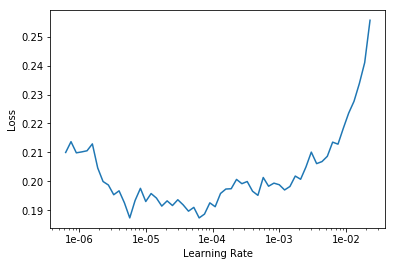

In [11]:
learn.lr_find()
learn.recorder.plot()

In [12]:
learn.unfreeze()
learn.fit_one_cycle(10, max_lr=slice(1e-6, 1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.229745,0.441736,0.884335,02:41
1,0.229791,0.437707,0.886072,02:39
2,0.245641,0.429537,0.890934,02:41
3,0.186843,0.418156,0.890587,02:39
4,0.164266,0.383706,0.904481,02:40
5,0.134278,0.361849,0.903786,02:42
6,0.089697,0.347211,0.916290,02:42
7,0.080197,0.333228,0.919069,02:35
8,0.068846,0.331992,0.915943,02:35
9,0.063067,0.330666,0.916290,02:34


In [13]:
learn.save('stage-2')

In [14]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (11518 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
000_hatsune_miku,000_hatsune_miku,000_hatsune_miku,000_hatsune_miku,000_hatsune_miku
Path: data\anime-faces;

Valid: LabelList (2879 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
176_sendou_erika,074_daidouji_tomoyo,037_lala_satalin_deviluke,134_nunnally_lamperouge,046_alice_margatroid
Path: data\anime-faces;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, k

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


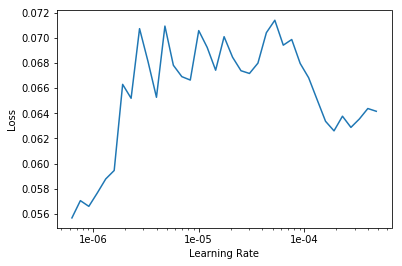

In [15]:
learn.lr_find()
learn.recorder.plot()

In [16]:
learn.unfreeze()
learn.fit_one_cycle(10, max_lr=slice(1e-6, 1e-5))

epoch,train_loss,valid_loss,accuracy,time
0,0.066424,0.327726,0.919416,02:34
1,0.055587,0.324571,0.920806,02:35
2,0.062421,0.326280,0.919069,02:35
3,0.060637,0.326931,0.920806,02:36
4,0.063364,0.322141,0.920111,02:39
5,0.049042,0.323314,0.920806,02:37
6,0.054094,0.325405,0.919764,02:40
7,0.049407,0.322319,0.924279,02:40
8,0.047984,0.321844,0.923585,02:39
9,0.047996,0.322220,0.922195,02:39


In [17]:
learn.save('stage-3')

In [18]:
learn.load('stage-3')

Learner(data=ImageDataBunch;

Train: LabelList (11518 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
000_hatsune_miku,000_hatsune_miku,000_hatsune_miku,000_hatsune_miku,000_hatsune_miku
Path: data\anime-faces;

Valid: LabelList (2879 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
176_sendou_erika,074_daidouji_tomoyo,037_lala_satalin_deviluke,134_nunnally_lamperouge,046_alice_margatroid
Path: data\anime-faces;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, k

In [19]:
# this is a hook (learned about it 
# here: https://forums.fast.ai/t/how-to-find-similar-images-based-on-final-embedding-layer/16903/13)
#hooks are used for saving intermediate computations

class SaveFeatures():
    features=None
    def __init__(self, m):
        self.hook = m.register_forward_hook(self.hook_fn)
        self.features = None
    def hook_fn(self, module, input, output):
        out = output.detach().cpu().numpy()
        if isinstance(self.features, type(None)):
            self.features = out
        else:
            self.features = np.row_stack((self.features,out))
    def remove(self):
        self.hook.remove()

In [20]:
sf = SaveFeatures(learn.model[1][5])

In [21]:
sf

In [23]:
#create the feature vector
#getting predictions on the data 
#The feature vectors would be saved in the sf variable intiated above
_=learn.get_preds(data.train_ds)
_=learn.get_preds(DatasetType.Valid)

In [437]:
img_path = [str(x) for x in (list(data.train_ds.items)+list(data.valid_ds.items))]

In [438]:
feature_dict = dict(zip(img_path, sf.features))

In [439]:
len(feature_dict)

14397

In [440]:
len(sf2.features)

14397

In [441]:
pickle.dump(feature_dict, open(path/'feature_dict.p', 'wb'))

In [442]:
#Using local Sensitive hashing to find similar near images 

In [443]:
feature_dict = pickle.load(open(path/'feature_dict.p', 'rb'))

In [444]:
from lshash.lshash import LSHash
#local sensitivty Hashing
k = 10 # hash size
L = 5 #number of tables
d = 512 # Dimension of feature vector

In [445]:
lsh = LSHash(hash_size=k, input_dim=d, num_hashtables=L)

In [446]:
for img_path, vec in(feature_dict.items()):
    lsh.index(vec.flatten(),img_path)

In [447]:
pickle.dump(lsh, open(path/'lsh.p', "wb"))

In [448]:
#Visualing output now! 


In [449]:
feature_dict = pickle.load(open(path/'feature_dict.p', 'rb'))
lsh = pickle.load(open(path/'lsh.p', 'rb'))

In [450]:
from PIL import Image

In [451]:
def get_similar_item(idx, feature_dict, lsh_variable, n_items = 5):
    response = lsh_variable.query(feature_dict[list(feature_dict.keys())[idx]].flatten(), 
                                        num_results = len(feature_dict)-1, distance_func = 'hamming') 
#    
    print(len(response))
    columns = 3
    rows = int(np.ceil((n_items+1)*2/columns))
    fig=plt.figure(figsize=(2*rows, 3*rows))
    for i in range(1, (columns*rows *2)+1):
        if i<n_items+2:
            img = Image.open(response[i-1][0][1])
            fig.add_subplot(rows, columns, i)
            plt.imshow(img)
        elif i < n_items*2 +3:
            print(-i+n_items+1)
            img = Image.open(response[-i+n_items+1][0][1])
            fig.add_subplot(rows, columns, i)
            plt.imshow(img)

    return plt.show()


3690
-1
-2
-3
-4
-5
-6


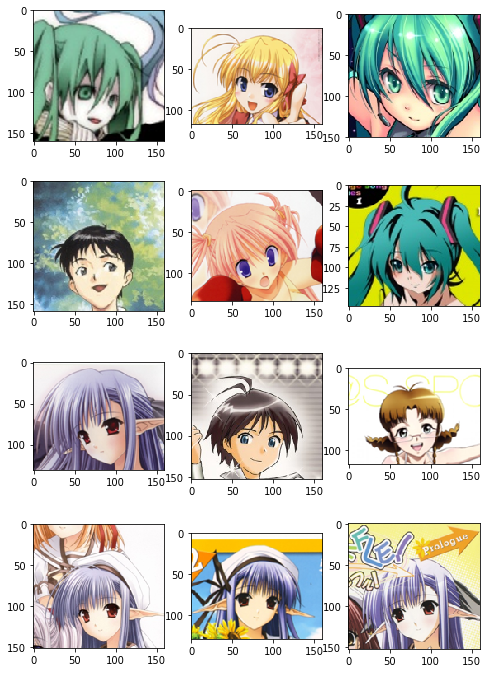

In [452]:
get_similar_item(0, feature_dict, lsh,5)

4369
-1
-2
-3
-4
-5
-6
-7
-8
-9
-10
-11


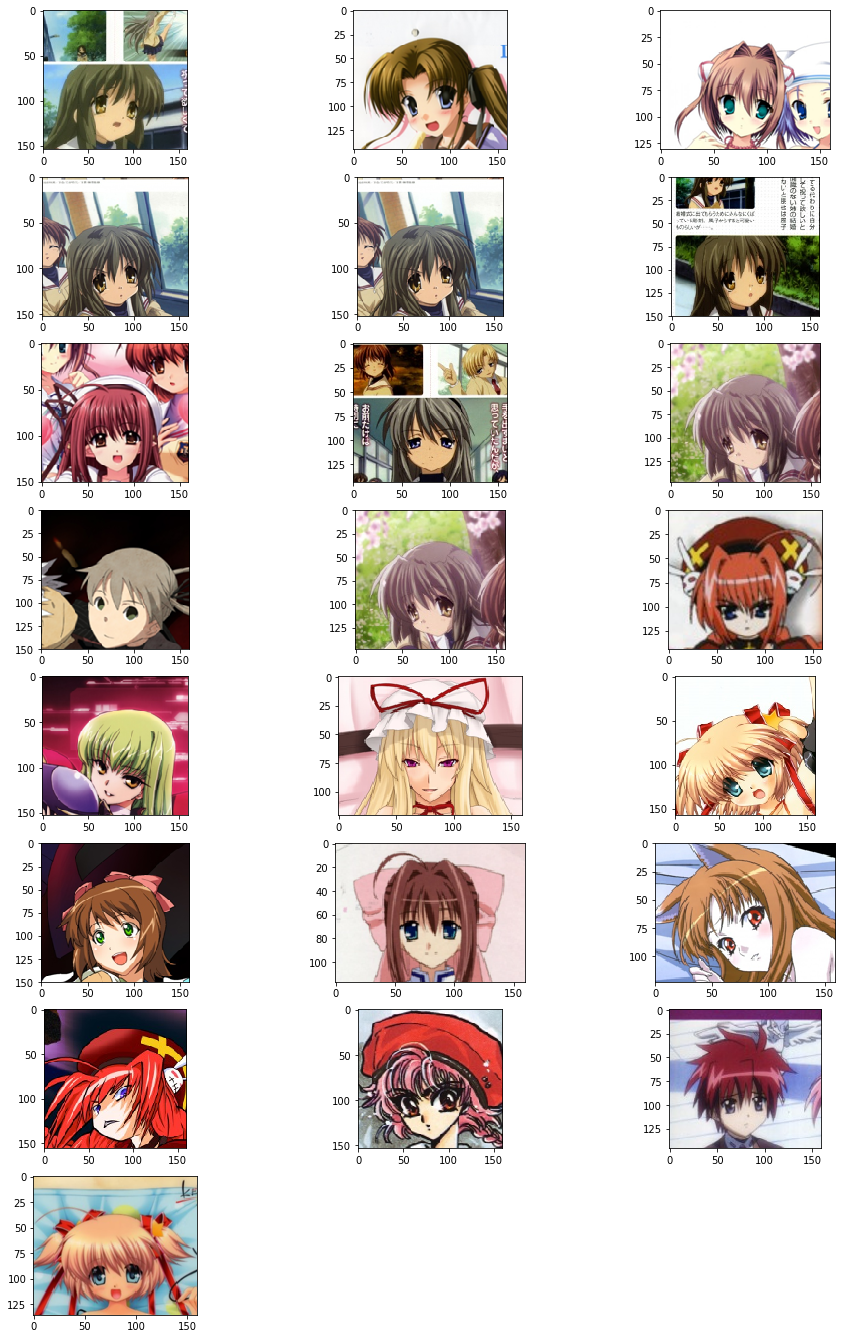

In [167]:
get_similar_item(14000, feature_dict, lsh, 10)

6388
-1
-2
-3
-4
-5
-6


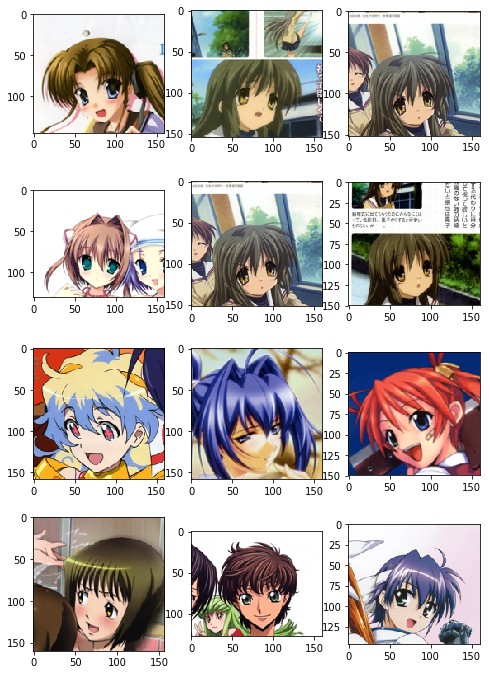

In [453]:
get_similar_item(14000, feature_dict, lsh, 5)

In [382]:
###PCA Similarity###

In [385]:
sf2 = SaveFeatures(learn.model[-1][-3])

In [386]:
#create the feature vector
#getting predictions on the data 
#The feature vectors would be saved in the sf variable intiated above
_=learn.get_preds(data.train_ds)
_=learn.get_preds(data.valid_ds)

In [387]:
len(sf.features), len(sf2.features)

(40312, 14397)

In [470]:
# predict TODO:Refactor and understand last 3 lines
sf3 = SaveFeatures(learn.model[-1][-3])

_=learn.get_preds(data.train_ds)

X_train = sf3.features
# store labels
y_train = data.train_ds.y

In [471]:
# predict TODO:Refactor and understand last 3 lines
sf3 = SaveFeatures(learn.model[-1][-3])

_=learn.get_preds(DatasetType.Valid)

X_valid = sf3.features
# store labels
y_valid = data.valid_ds.y

In [472]:
len(X_train), len(y_train), len(X_valid), len(y_valid)

(11518, 11518, 2879, 2879)

In [517]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [518]:
n_components = X_train.shape[1]
pca = PCA(n_components)

In [519]:
# fit on training data, to avoid overfitting if the PCA features are used for a classifier
PCA_X_train = pca.fit_transform(X_train)
PCA_X_valid = pca.transform(X_valid)

In [532]:
y_t = y_train.items
y_v = y_valid.items

In [533]:
y_t

array([  0,   0,   0,   0, ..., 172, 172, 172, 172], dtype=int64)

In [534]:
#train a Logisitic Regression Model with L1 regularisation
# to learn which features are most important for classfying
#specific anime types
CS = np.logspace(-4,4,10); 
results = pd.DataFrame(index=CS, columns=['train_score', 'valid_score'])
for C in CS:
    clf = LogisticRegression(penalty='l1', C=C).fit(PCA_X_train, y_t)
    results.loc[C, 'train_score'] = clf.score(PCA_X_train, y_t)
    results.loc[C, 'valid_score'] = clf.score(PCA_X_valid, y_v)

C:\Users\55133681\.conda\envs\fastai\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\55133681\.conda\envs\fastai\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\55133681\.conda\envs\fastai\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\55133681\.conda\envs\fastai\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\55133681\.conda\envs\fastai\lib\site-packages\skl

KeyboardInterrupt: 

In [535]:
clf = LogisticRegression(penalty='l1', C=166.8).fit(PCA_X_train, y_t)
print(clf.score(PCA_X_valid, y_v))

C:\Users\55133681\.conda\envs\fastai\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\55133681\.conda\envs\fastai\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.906217436609934


In [540]:
print(clf.score(PCA_X_valid, y_v))
coefs = clf.coef_

0.906217436609934


In [541]:
coefs.shape

(173, 512)

In [544]:
features_importance = np.abs(coefs).sum(axis=0)
features_importance.shape

(512,)

In [545]:
sorts = {}
for i in range(n_components):
    sorts[i] = np.argsort(PCA_X_valid[:,i])[::-1]

In [553]:
def show_valid(id_list, n_cols=5):
    fig,axs = plt.subplots(int(np.ceil(len(id_list)/n_cols)), n_cols, figsize=(20,10))
    for i, ax in enumerate(axs.flatten()):
        img, label = data.valid_ds[id_list[i]]
        show_image(img, ax=ax)
    return plt.tight_layout()

In [556]:
len(sorts)

512

Anime faces with most/least of feature3


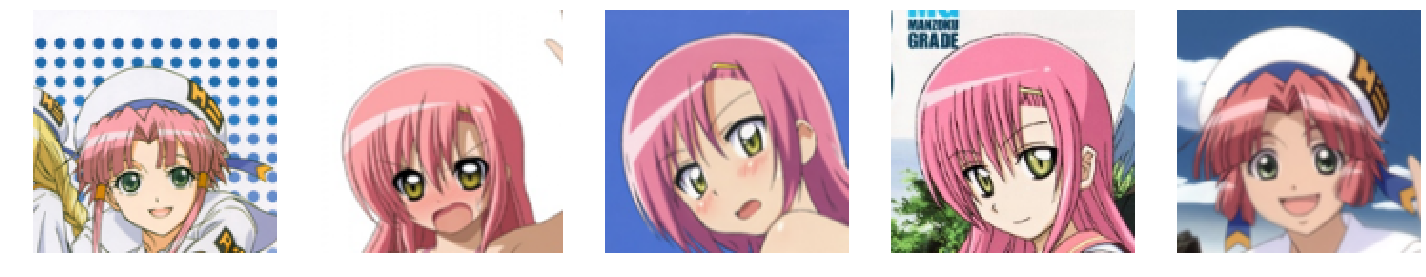

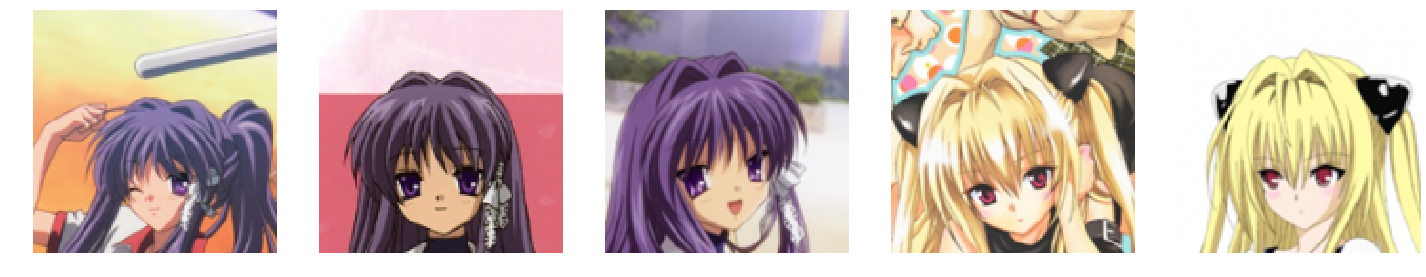

In [572]:
f=3
print(f'Anime faces with most/least of feature{f}')
show_valid(sorts[f][0:5])
show_valid(sorts[f][-6:-1])


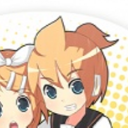

In [549]:
data.valid_ds[50][0]

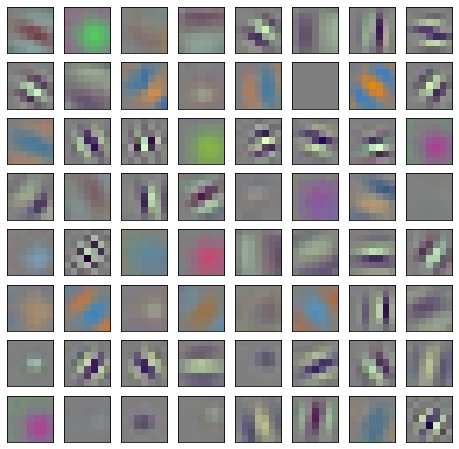

In [182]:
# https://discuss.pytorch.org/t/how-to-visualize-the-actual-convolution-filters-in-cnn/13850
from sklearn.preprocessing import minmax_scale

def visualize_first_layer(learn, save_name=None):
    conv1 = list(learn.model.children())[0][0]
    if isinstance(conv1, torch.nn.modules.container.Sequential):
        conv1 = conv1[0] # for some models, 1 layer inside
    weights = conv1.weight.data.cpu().numpy()
    weights_shape = weights.shape
    weights = minmax_scale(weights.ravel()).reshape(weights_shape)
    fig, axes = plt.subplots(8, 8, figsize=(8,8))
    for i, ax in enumerate(axes.flat):
        ax.imshow(np.rollaxis(weights[i], 0, 3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    if save_name:
        fig.savefig(str(save_name))

visualize_first_layer(learn)

In [217]:
a = learn.model[0][0];a

Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

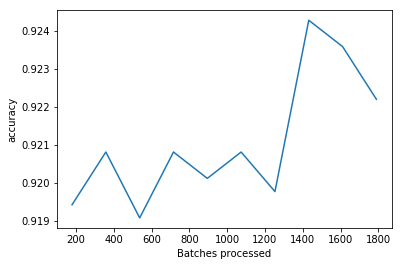

In [208]:
learn.recorder.plot_metrics()

In [221]:
def find_layers(module, ltype):    
    rv = []
    if isinstance(module, ltype):
        rv.append(module)
    else:
        for c in module.children():
            rv.extend(find_layers(c, ltype))
    return rv

In [223]:
a = find_layers(learn.model,  nn.Conv2d)

In [378]:
def visualize_layer(conv1, save_name=None):
#     conv1 = list(learn.model.children())[0][0]
#     if isinstance(conv1, torch.nn.modules.container.Sequential):
#         conv1 = conv1[0] # for some models, 1 layer inside
    weights = conv1.weight.data.cpu().numpy()
    weights_shape = weights.shape
    print(weights_shape)
    weights = minmax_scale(weights.ravel()).reshape(weights_shape)
    fig, axes = plt.subplots(8, 8, figsize=(8,8))
    for i, ax in enumerate(axes.flat):
        ax.imshow(np.rollaxis(weights[i], 0, 3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    if save_name:
        fig.savefig(str(save_name))


(64, 3, 7, 7)


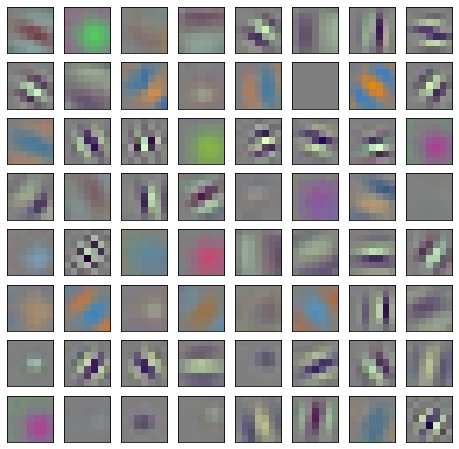

In [380]:
visualize__layer(a[0])

In [573]:
data.classes

['000_hatsune_miku',
 '001_kinomoto_sakura',
 '002_suzumiya_haruhi',
 '003_fate_testarossa',
 '004_takamachi_nanoha',
 '005_lelouch_lamperouge',
 '006_akiyama_mio',
 '007_nagato_yuki',
 '008_shana',
 '009_hakurei_reimu',
 '010_izumi_konata',
 '011_kirisame_marisa',
 '012_asahina_mikuru',
 '013_saber',
 '014_hiiragi_kagami',
 '015_c.c',
 '016_furukawa_nagisa',
 '017_louise',
 '018_kagamine_rin',
 '019_ayanami_rei',
 '020_remilia_scarlet',
 '021_hirasawa_yui',
 '022_kururugi_suzaku',
 '023_hiiragi_tsukasa',
 '024_fujibayashi_kyou',
 '025_souryuu_asuka_langley',
 '026_tohsaka_rin',
 '027_izayoi_sakuya',
 '028_tainaka_ritsu',
 '029_kallen_stadtfeld',
 '030_aisaka_taiga',
 '031_kotobuki_tsumugi',
 '032_yakumo_yukari',
 '033_kagamine_len',
 '034_sakagami_tomoyo',
 '035_yoko',
 '036_reisen_udongein_inaba',
 '037_lala_satalin_deviluke',
 '038_takara_miyuki',
 '039_yagami_hayate',
 '040_flandre_scarlet',
 '041_saigyouji_yuyuko',
 '042_tsukimura_mayu',
 '043_konpaku_youmu',
 '044_nakano_azusa',
